# Data wrangling<a id='Data_wrangling'></a>

In [204]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

In [205]:
#Load raw data
patient_data = pd.read_csv(('../raw_data/heart.csv'))

In [206]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [207]:
patient_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [208]:
#Number of missing values in each column
missing = pd.concat([patient_data.isnull().sum(), 100 * patient_data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by=['count','%'])

,count,%
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


### Categorical Features<a id='Categorical_Features'></a>

In [209]:
patient_data.select_dtypes('object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
...,...,...,...,...,...
913,M,TA,Normal,N,Flat
914,M,ASY,Normal,N,Flat
915,M,ASY,Normal,Y,Flat
916,F,ATA,LVH,N,Flat


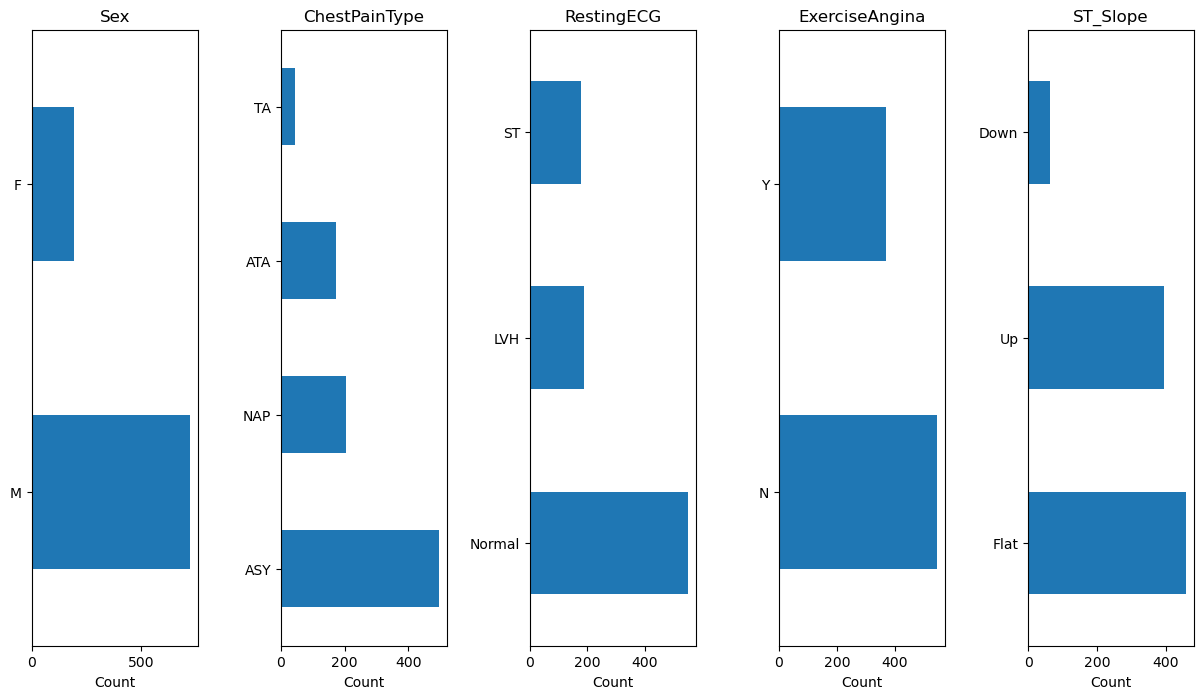

In [210]:
#Ploting each object type
fig, ax = plt.subplots(1, 5, figsize=(15,8))
patient_data.Sex.value_counts().plot(kind='barh', ax=ax[0])
ax[0].set_title('Sex')
ax[0].set_xlabel('Count')
patient_data.ChestPainType.value_counts().plot(kind='barh', ax=ax[1])
ax[1].set_title('ChestPainType')
ax[1].set_xlabel('Count')
patient_data.RestingECG.value_counts().plot(kind='barh', ax=ax[2])
ax[2].set_title('RestingECG')
ax[2].set_xlabel('Count')
patient_data.ExerciseAngina.value_counts().plot(kind='barh', ax=ax[3])
ax[3].set_title('ExerciseAngina')
ax[3].set_xlabel('Count')
patient_data.ST_Slope.value_counts().plot(kind='barh', ax=ax[4])
ax[4].set_title('ST_Slope')
ax[4].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

In [211]:
#Total number of patients per sex
patient_sex_count = patient_data.groupby('Sex')[['Sex']].count()
patient_sex_count.head()

,Sex
Sex,
F,193
M,725


In [212]:
#Number of cases positive for heart disease per sex
sex_positive_count = patient_data[patient_data.HeartDisease == 1].groupby('Sex')[['HeartDisease']].count()
sex_positive_count.head()

,HeartDisease
Sex,
F,50
M,458


In [213]:
#Number of each chest pain type and heart disease reported per sex 
sex_ChestPainType = patient_data.groupby(['Sex','ChestPainType'])[['ChestPainType']].count()
sex_ChestPainType['HeartDisease'] = patient_data[patient_data.HeartDisease == 1].groupby(['Sex','ChestPainType'])[['ChestPainType']].count()
print(sex_ChestPainType)

                   ChestPainType  HeartDisease
Sex ChestPainType                             
F   ASY                       70            39
    ATA                       60             4
    NAP                       53             6
    TA                        10             1
M   ASY                      426           353
    ATA                      113            20
    NAP                      150            66
    TA                        36            19


In [214]:
#Number of each resting ECG type and heart disease reported per sex 
sex_RestingECG = patient_data.groupby(['Sex','RestingECG'])[['RestingECG']].count()
sex_RestingECG['HeartDisease'] = patient_data[patient_data.HeartDisease == 1].groupby(['Sex','RestingECG'])[['RestingECG']].count()
print(sex_RestingECG)

                RestingECG  HeartDisease
Sex RestingECG                          
F   LVH                 47            14
    Normal             118            29
    ST                  28             7
M   LVH                141            92
    Normal             434           256
    ST                 150           110


In [215]:
#Number of each exercise angina and heart disease reported per sex 
sex_ExerciseAngina = patient_data.groupby(['Sex','ExerciseAngina'])[['ExerciseAngina']].count()
sex_ExerciseAngina['HeartDisease'] = patient_data[patient_data.HeartDisease == 1].groupby(['Sex','ExerciseAngina'])[['ExerciseAngina']].count()
print(sex_ExerciseAngina)

                    ExerciseAngina  HeartDisease
Sex ExerciseAngina                              
F   N                          150            23
    Y                           43            27
M   N                          397           169
    Y                          328           289


In [216]:
#Number of each ST slope type and heart disease reported per sex 
sex_ST_Slope = patient_data.groupby(['Sex','ST_Slope'])[['ST_Slope']].count()
sex_ST_Slope['HeartDisease'] = patient_data[patient_data.HeartDisease == 1].groupby(['Sex','ST_Slope'])[['ST_Slope']].count()
print(sex_ST_Slope)

              ST_Slope  HeartDisease
Sex ST_Slope                        
F   Down             7             5
    Flat            75            39
    Up             111             6
M   Down            56            44
    Flat           385           342
    Up             284            72


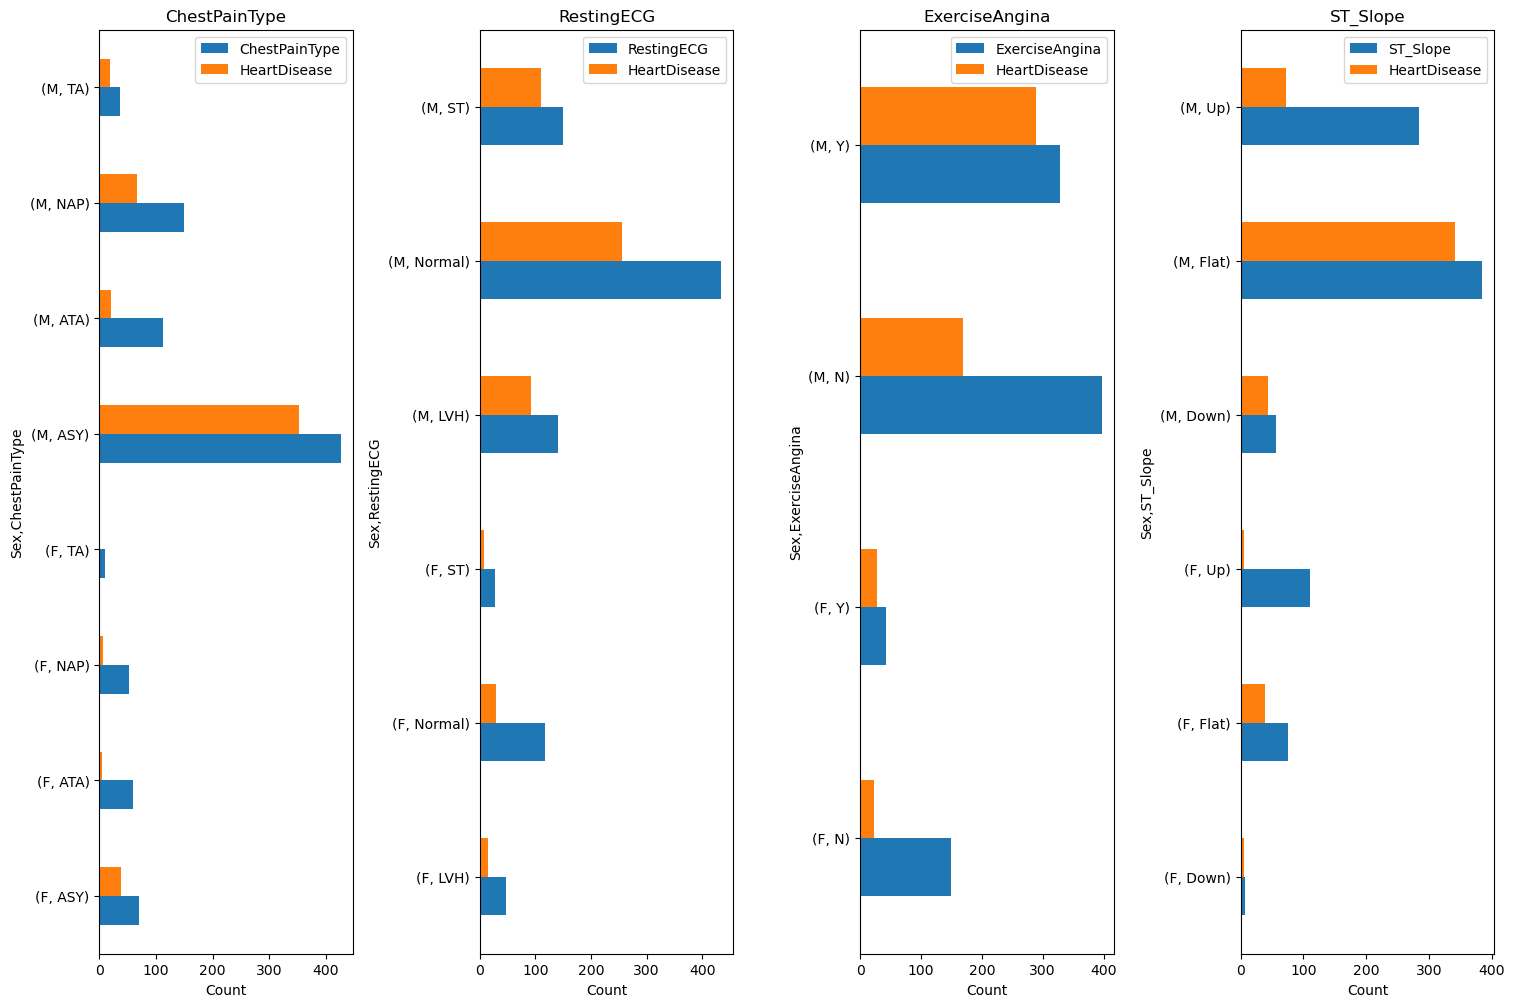

In [217]:
fig, ax = plt.subplots(1, 4, figsize=(18,12))
sex_ChestPainType.plot(kind='barh', ax=ax[0])
ax[0].set_title('ChestPainType')
ax[0].set_xlabel('Count')
sex_RestingECG.plot(kind='barh', ax=ax[1])
ax[1].set_title('RestingECG')
ax[1].set_xlabel('Count')
sex_ExerciseAngina.plot(kind='barh', ax=ax[2])
ax[2].set_title('ExerciseAngina')
ax[2].set_xlabel('Count')
sex_ST_Slope.plot(kind='barh', ax=ax[3])
ax[3].set_title('ST_Slope')
ax[3].set_xlabel('Count')
plt.subplots_adjust(wspace=0.5);

### Numerical Features<a id='Numberical_Features'></a>

In [218]:
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


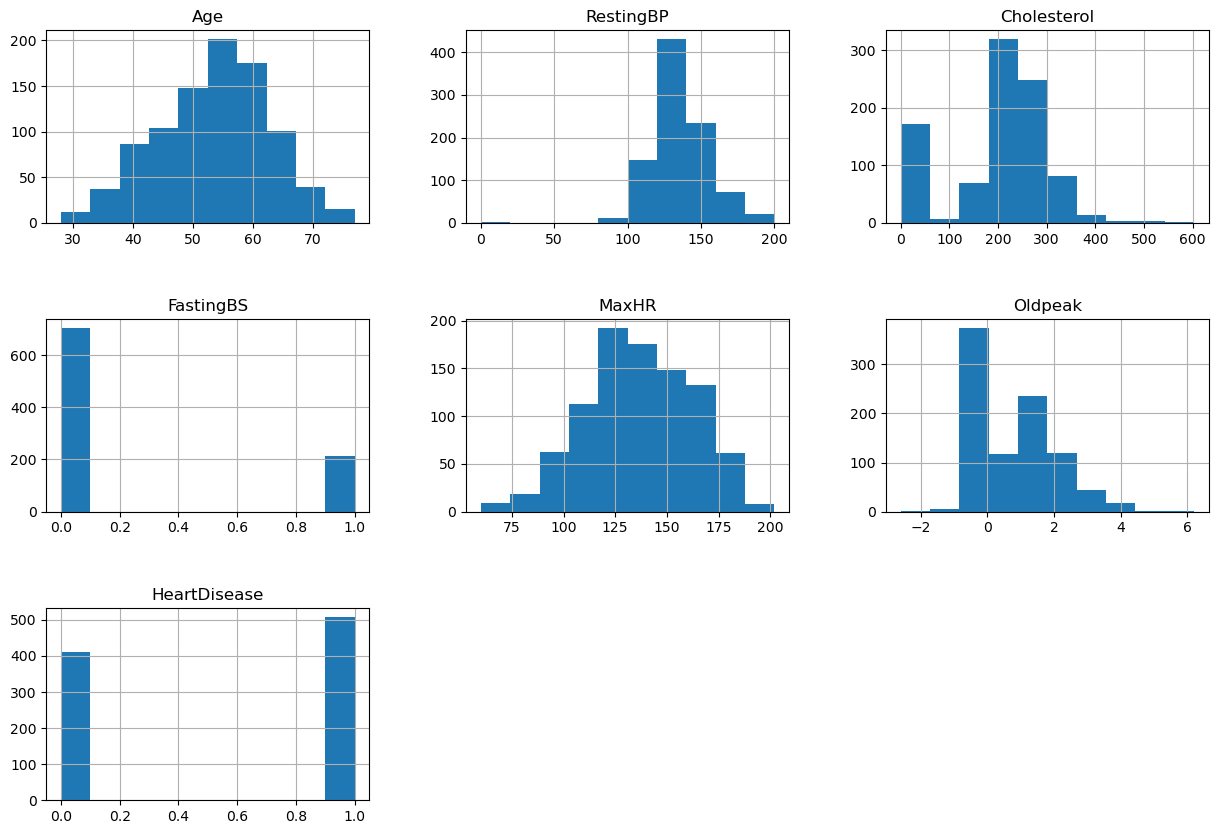

In [219]:
patient_data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [220]:
patient_data_male = patient_data[patient_data['Sex'] == 'M']
patient_data_male.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0


In [221]:
patient_data_female = patient_data[patient_data['Sex'] == 'F']
patient_data_female.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0


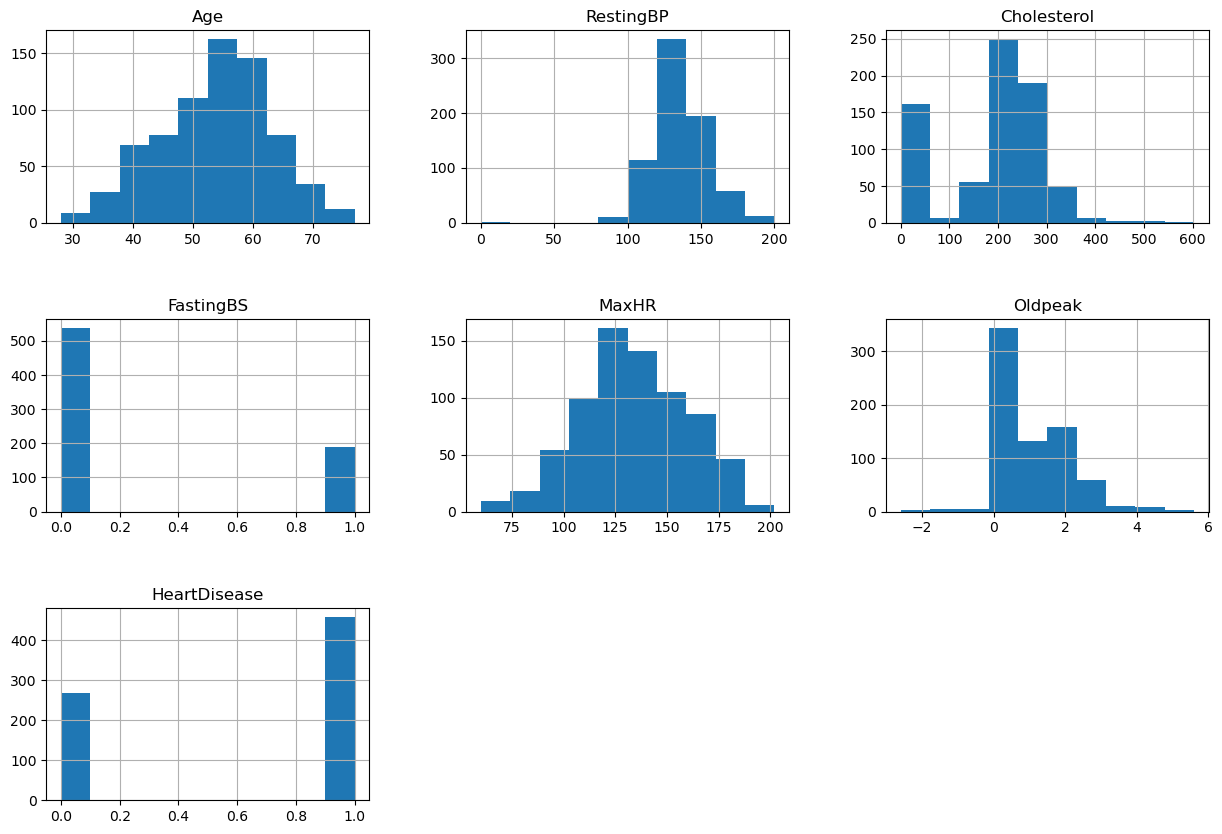

In [222]:
patient_data_male.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

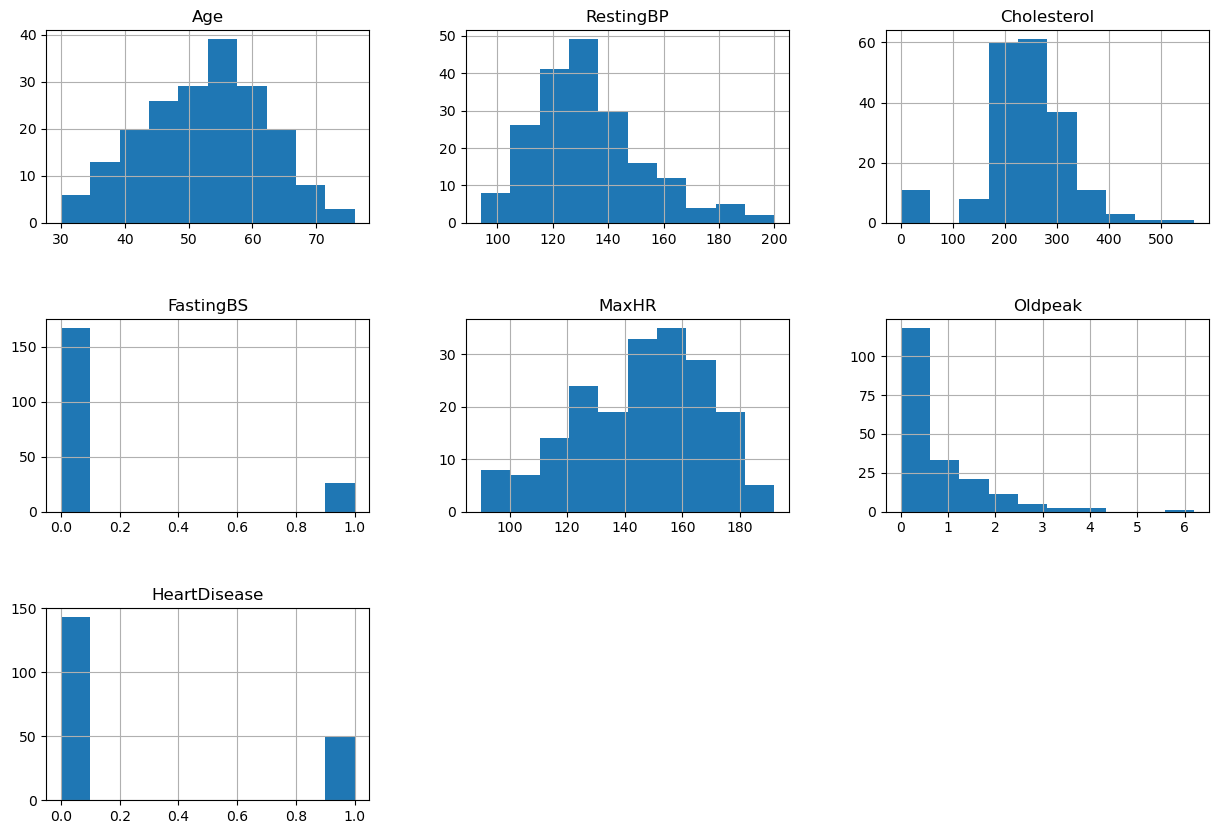

In [223]:
patient_data_female.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

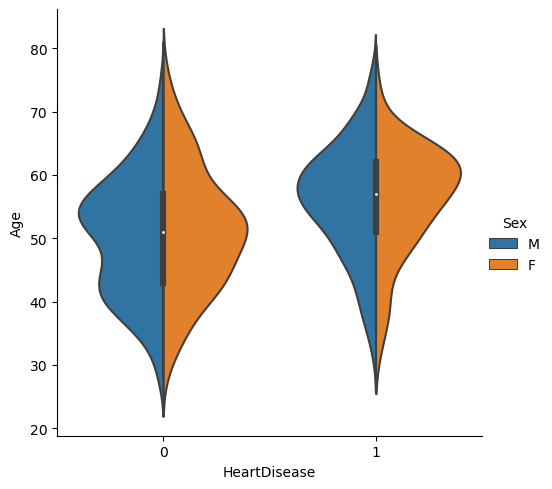

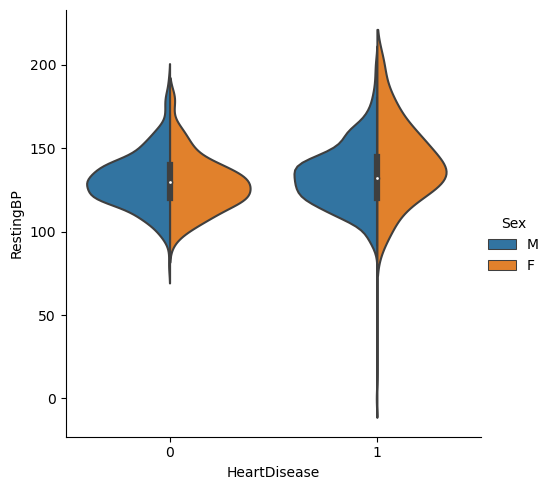

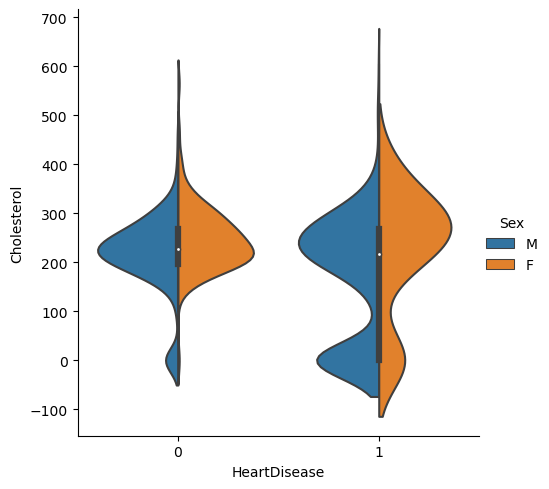

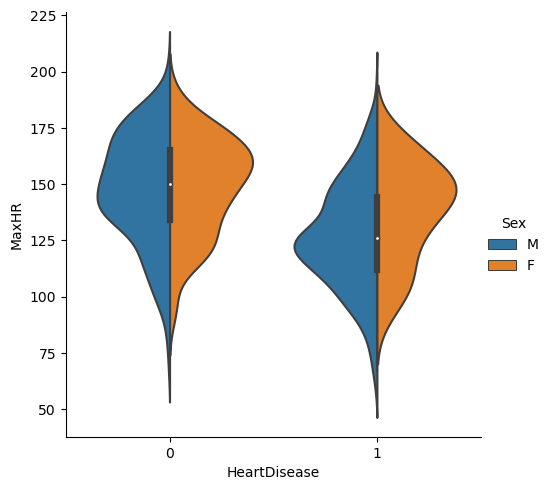

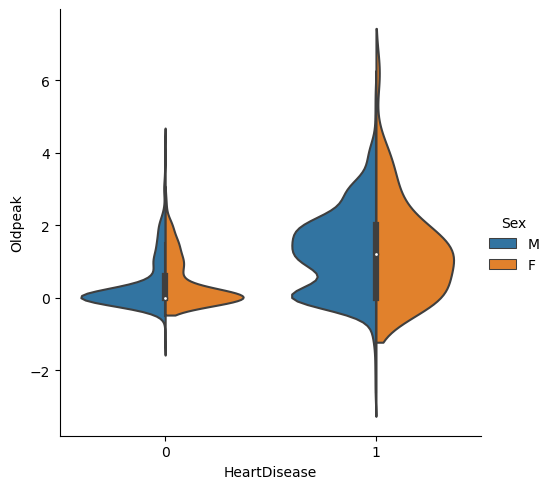

In [233]:
sns.catplot(data = patient_data, x = 'HeartDisease', y = 'Age', hue = 'Sex', kind = 'violin', split = True)
sns.catplot(data = patient_data, x = 'HeartDisease', y = 'RestingBP', hue = 'Sex', kind = 'violin', split = True)
sns.catplot(data = patient_data, x = 'HeartDisease', y = 'Cholesterol', hue = 'Sex', kind = 'violin', split = True)
sns.catplot(data = patient_data, x = 'HeartDisease', y = 'MaxHR', hue = 'Sex', kind = 'violin', split = True)
sns.catplot(data = patient_data, x = 'HeartDisease', y = 'Oldpeak', hue = 'Sex', kind = 'violin', split = True)

In [186]:
patient_data[patient_data.RestingBP == 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [187]:
patient_data[patient_data.Cholesterol == 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [188]:
#dropping patient data with missing resting BP as they are also missing cholesterol
patient_data.drop(patient_data[patient_data.RestingBP ==0].index, inplace = True)

In [189]:
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.509269,9.437636,28.0,47.0,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.0,130.0,140.0,200.0
Cholesterol,917.0,199.016358,109.246330,0.0,174.0,223.0,267.0,603.0
FastingBS,917.0,0.233370,0.423206,0.0,0.0,0.0,0.0,1.0
MaxHR,917.0,136.789531,25.467129,60.0,120.0,138.0,156.0,202.0
Oldpeak,917.0,0.886696,1.066960,-2.6,0.0,0.6,1.5,6.2
HeartDisease,917.0,0.552890,0.497466,0.0,0.0,1.0,1.0,1.0


In [190]:
#Replacing patient data where cholesterol is missing with mean
patient_data.loc[patient_data.Cholesterol == 0, 'Cholesterol'] = patient_data['Cholesterol'].mean(axis=0)

In [191]:
#Replacing patient data where Oldpeak is less than zero with mean
patient_data.loc[patient_data.Oldpeak < 0, 'Oldpeak'] = patient_data['Oldpeak'].mean(axis=0)

In [192]:
patient_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,917.0,53.509269,9.437636,28.0,47.000000,54.0,60.0,77.0
RestingBP,917.0,132.540894,17.999749,80.0,120.000000,130.0,140.0,200.0
Cholesterol,917.0,236.128459,56.231401,85.0,199.016358,223.0,267.0,603.0
FastingBS,917.0,0.233370,0.423206,0.0,0.000000,0.0,0.0,1.0
MaxHR,917.0,136.789531,25.467129,60.0,120.000000,138.0,156.0,202.0
Oldpeak,917.0,0.913225,1.039888,0.0,0.000000,0.6,1.5,6.2
HeartDisease,917.0,0.552890,0.497466,0.0,0.000000,1.0,1.0,1.0


In [167]:
patient_data.shape

(917, 12)

In [203]:
# save the data to a new csv file
datapath = '../data'
save_file(patient_data, 'patient_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data/patient_data_cleaned.csv"


## Summary<a id='Summary'></a>

Originally there were 918 entries with 12 indices provided by the raw data received. After verifying that there were no missing or null values, I began to look deeper into each index starting with the categorical features such as sex, chest pain type, and resting ECG to ensure the data was presented in a relevant manner and did not contain any erroneous or replacement values for null. Finding none, I separated each category by sex and and plotted the resultant values compared to positive cases of Heart disease to evaluate if the model would need to be adjusted based on sex. Finding no significant difference in the categorical features based on sex, I moved on to exploring the numerical features contained within the data set. First, inspecting each index to ensure the data was presented in a relevant manner and did not contain any erroneous or replacement values for null. Finding that numerous values for cholesterol were listed as zero, a few values for Oldpeak were listed below the acceptable range, and one patient with a resting BP of zero I made a note that these categories would need to be adjusted in order to be properly processed in the data set. Having noted this I moved on to analyzing the separated numerical features similarly to the categorical features as mentioned above to gauge any significant differences between the sexes. Finding none, I began augmenting the data to eliminate missing or erroneous values. Noting that a significant number of missing data points pertained to cases in which the patients were positive for heart disease, I elected to replace the data points with the mean value only dropping the patient which had a missing value for both resting BP and Cholesterol. Leaving me with a clean data set organized in a dataframe that will allow me to analyze trends and properly determine significant factors for predicting heart disease.